In [1]:
# 단어 빈도 및 워드 클라우드에 한글 인식
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlin -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [2]:
#KoNLPY 설치
!pip install konlpy

#pakage 설치
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 전처리
import re

# 형태소 분석
from konlpy.tag import Okt

# wordcloud
import nltk
from collections import Counter
from wordcloud import WordCloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 29.9 MB/s eta 0:00:00


# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fm_df_origin = pd.read_csv("/content/drive/MyDrive/24-2 Main/data/구글맵_추가리뷰_최종.csv")
fm_df_origin

,restaurant,reviews
0,3대삼계장인,삼계탕이 국물이 진하고 걸죽하네요. 밥은 별도로 공기밥으로 줘서 특이했습니다. 녹두...
1,3대삼계장인,복날 전후로 오일 정도는 텀주고 가야\n줄 덜 서서 먹을 수 있는\n서초동의 독보적...
2,3대삼계장인,잣삼계탕 먹었는데 생각보다 걸쭉한 국물에 간이 적당히 되어 있어서 따로 간을 할 필...
3,3대삼계장인,"일단 삼계탕은 맛있다. 19,000원이라는 가격이 사악하지만 뭐 알고도 오는거니까...."
4,3대삼계장인,수비스닭볶음탕 맛있습니다.\n서비스 좋고 친절하고 무지 분주합니다.\n가격은 싸지 ...
...,...,...
43802,포썸,내가 지금까지 한국에서 먹어본 쌀국수 중 최고의 쌀국수 중 하나인 숨겨진 보석입니다.
43803,포썸,확실히 한국 최고임
43804,포썸,정말 좋은 메뉴에요! 저희는 베트남 사람인데 맛이 오리지널과 비슷해서 정말 맛있게 ...
43805,포썸,훌륭한 음식과 깨끗한 레스토랑.


# 감성분석 시작

In [ ]:
fm_df = fm_df_origin[fm_df_origin["restaurant"] == "포썸"]
fm_df

,restaurant,reviews
43754,포썸,쌀국수 국물이 정말 진하고 맛있어요. 쌀국수 추천합니다. 분짜도 맛있어요. 고구마롤...
43755,포썸,진짜 진짜 맛있음...말이필요없고 서비스도 좋아요\n양도 많아서 배터지게 먹었네요…
43756,포썸,7말8초가 가장 덥다고 하던데 오늘 정말 더웠습니다. 망원동에 볼일이 있어서 방문하...
43757,포썸,쌀국수 맛있는집 입니다~\n혼자오신분은 바에서 드시라고 합니다.\n밑반찬은 셀프로 ...
43758,포썸,갑자기 쌀국수가먹고싶어 프롬하노이가려다 우연히가게된 포썸.와우!여기왤케맛있음? 고기...
43759,포썸,백문이불여일견...두말하면 잔소리 세 말하면 입 아픕니다 ^^\n맛집만 글을 쓰기로...
43760,포썸,맛있는 녀석들 보고 가야지 가야지 하다가 드디어 가게 되었는데 너무 맛있어요.\n갈...
43761,포썸,"트럭시절부터 먹어봤는데 고기가 더 푸짐해지고, 육수도 더 진해졌어요. 해산물매운쌀국..."
43762,포썸,비빔쌀국수 분팃느엉 시켜서 먹었는데 제가 다른곳에서 즐겨 먹었던 분보싸오랑 구성은 ...
43763,포썸,푸드트럭에서 장사 할때부터 다니던곳.\n매장 오픈하시고 정말로 오랫만에 방문해봄 ㅎ...


In [ ]:
import re

tm_list = []

for i in range(len(fm_df)):
    text = fm_df["reviews"].iloc[i]

    # NaN 또는 비문자열 값 처리
    if not isinstance(text, str):
        text = ""  # 비문자열 값은 빈 문자열로 처리

    # 정규식 적용
    text = re.sub(r"\x00-\x1F\x7F]", "", text)  # 제어문자 제거
    text = re.sub(r"\W", " ", text)  # 구두점 제거
    tm_list.append(text)

# 결과 확인
print(tm_list[:5])

['쌀국수 국물이 정말 진하고 맛있어요  쌀국수 추천합니다  분짜도 맛있어요  고구마롤이 엄청 달구 좋아요  영수증리뷰로 받아서 먹었는데 맛있었어요  블루리본을 3개나 받은 찐맛집입니다 ', '진짜 진짜 맛있음   말이필요없고 서비스도 좋아요 양도 많아서 배터지게 먹었네요 ', '7말8초가 가장 덥다고 하던데 오늘 정말 더웠습니다  망원동에 볼일이 있어서 방문하던 중에 갈비쌀국수가 있다는 얘기를 듣고 꼭 방문하고 싶어서 찾아왔습니다  망리단길에서 벗어나 매장에 들어서니 시원한 에어컨 바람에 살거 같더군요  인테리어는 깔끔하면서 어딘가에 베트남의 느낌이 느껴집니다  메뉴는 쌀국수와 사이드  음료가 있습니다  쌀국수는 여러 종류가 있는데 왕갈비 쌀국수의 경우 테이블마자 한그릇으로 한정판매를 하고 있습니다  ', '쌀국수 맛있는집 입니다  혼자오신분은 바에서 드시라고 합니다  밑반찬은 셀프로 떠다먹어요  사장님 서비스도 좋아요 여성분들 긴머리묶고드시라고 머리끈도 준비되어있어요   ', '갑자기 쌀국수가먹고싶어 프롬하노이가려다 우연히가게된 포썸 와우 여기왤케맛있음  고기쌀국수는국물이진하고고소한맛 해산물쌀국수는불향나는육수맛 짜조도 맛있다 엄마와 맛나게먹음 고수와레몬은 달라고얘기해야하고 면추가는무료인것같음 사진상의 하얀무채는 새콤달콤 앞으로 단골각  근데 여기 트럭   장사하셨나보던데 유명한곳이었음 ']


# 문서 전처리 및 동음이의어 정리

In [ ]:
# 명사, 동사, 형용사 추출

# Define a very basic tokenizer and part-of-speech extractor
stop_words = ["하다", "있다", "되다"]  # List of stop words

def simple_tokenizer(text):
    # Split words based on spaces
    words = text.split()
    # Simulate noun/verb/adjective filtering
    filtered_words = [word for word in words if len(word) > 1 and word not in stop_words]
    return filtered_words

# Extract nouns, verbs, and adjectives
words_list = []
for text in tm_list:
    words_list.extend(simple_tokenizer(text))

# Display the processed words
words_list  # Show the first 20 extracted words

['쌀국수',
 '국물이',
 '정말',
 '진하고',
 '맛있어요',
 '쌀국수',
 '추천합니다',
 '분짜도',
 '맛있어요',
 '고구마롤이',
 '엄청',
 '달구',
 '좋아요',
 '영수증리뷰로',
 '받아서',
 '먹었는데',
 '맛있었어요',
 '블루리본을',
 '3개나',
 '받은',
 '찐맛집입니다',
 '진짜',
 '진짜',
 '맛있음',
 '말이필요없고',
 '서비스도',
 '좋아요',
 '양도',
 '많아서',
 '배터지게',
 '먹었네요',
 '7말8초가',
 '가장',
 '덥다고',
 '하던데',
 '오늘',
 '정말',
 '더웠습니다',
 '망원동에',
 '볼일이',
 '있어서',
 '방문하던',
 '중에',
 '갈비쌀국수가',
 '있다는',
 '얘기를',
 '듣고',
 '방문하고',
 '싶어서',
 '찾아왔습니다',
 '망리단길에서',
 '벗어나',
 '매장에',
 '들어서니',
 '시원한',
 '에어컨',
 '바람에',
 '살거',
 '같더군요',
 '인테리어는',
 '깔끔하면서',
 '어딘가에',
 '베트남의',
 '느낌이',
 '느껴집니다',
 '메뉴는',
 '쌀국수와',
 '사이드',
 '음료가',
 '있습니다',
 '쌀국수는',
 '여러',
 '종류가',
 '있는데',
 '왕갈비',
 '쌀국수의',
 '경우',
 '테이블마자',
 '한그릇으로',
 '한정판매를',
 '하고',
 '있습니다',
 '쌀국수',
 '맛있는집',
 '입니다',
 '혼자오신분은',
 '바에서',
 '드시라고',
 '합니다',
 '밑반찬은',
 '셀프로',
 '떠다먹어요',
 '사장님',
 '서비스도',
 '좋아요',
 '여성분들',
 '긴머리묶고드시라고',
 '머리끈도',
 '준비되어있어요',
 '갑자기',
 '쌀국수가먹고싶어',
 '프롬하노이가려다',
 '우연히가게된',
 '포썸',
 '와우',
 '여기왤케맛있음',
 '고기쌀국수는국물이진하고고소한맛',
 '해산물쌀국수는불향나는육수맛',
 '짜조도',
 '맛있다',
 '엄마와',
 '맛나게먹음'

# 감성사전 만들기

In [ ]:
senti_dic_df = pd.read_table("/content/drive/MyDrive/24-2 Main/SentiWord_Dict.txt",
                           sep = "\t",
                           names = ["word", "score"], encoding = 'utf-8')

In [ ]:
senti_dic_df

,word,score
0,(-;,1.0
1,(;_;),-1.0
2,(^^),1.0
3,(^-^),1.0
4,(^^*,1.0
...,...,...
14850,갈등 -1,NaN
14851,의혹,-1.0
14852,내팽개치다,-2.0
14853,횡령,-2.0


In [ ]:
# Null 값 식별 및 해당 word 컬럼 값 추출
null_score_words = senti_dic_df[senti_dic_df['score'].isnull()]['word']

# 결과 출력
print("Null score가 있는 word 값:")
print(null_score_words.tolist())


Null score가 있는 word 값:
['갈등 -1']


In [ ]:
# 값 수정
senti_dic_df.loc[senti_dic_df['word'] == "갈등 -1", 'word'] = "갈등"
senti_dic_df.loc[senti_dic_df['word'] == "갈등", 'score'] = -1

In [ ]:
senti_dic_df[14850:]

,word,score
14850,갈등,-1.0
14851,의혹,-1.0
14852,내팽개치다,-2.0
14853,횡령,-2.0
14854,불안증,-2.0


In [ ]:
senti_dic_df["score"].value_counts()

,count
score,
-1.0,5031
-2.0,4799
2.0,2603
1.0,2268
0.0,154


In [ ]:
senti_dic_df["감성구분"] = np.select([senti_dic_df["score"] >= 1,
                                senti_dic_df["score"] <= -1,
                                senti_dic_df["score"] == 0],
                                ["긍정", "부정", "중립"])
senti_dic_df

,word,score,감성구분
0,(-;,1.0,긍정
1,(;_;),-1.0,부정
2,(^^),1.0,긍정
3,(^-^),1.0,긍정
4,(^^*,1.0,긍정
...,...,...,...
14850,갈등,-1.0,부정
14851,의혹,-1.0,부정
14852,내팽개치다,-2.0,부정
14853,횡령,-2.0,부정


# 감성분석

In [ ]:
words_list_df = pd.DataFrame(words_list,
                            columns = ["word"])
join_df = pd.merge(words_list_df, senti_dic_df, how = "inner")
join_df

,word,score,감성구분
0,벗어나,-1.0,부정
1,시원한,1.0,긍정
2,맛있다,2.0,긍정
3,잔소리,-1.0,부정
4,좋은,2.0,긍정
5,맛있는,2.0,긍정
6,맛있게,2.0,긍정
7,즐겨,2.0,긍정
8,제대로,1.0,긍정
9,ㅎㅎ,1.0,긍정


In [ ]:
senti_counts_df = join_df.groupby("word")["score"].sum().reset_index()
senti_counts_df["n"] = senti_counts_df["score"].abs()
senti_counts_df.sort_values(by = ["score"], ascending = False, inplace = True)
senti_counts_df

,word,score,n
5,맛있게,8.0,8.0
15,좋은,6.0,6.0
8,맛집,6.0,6.0
22,훌륭한,4.0,4.0
6,맛있는,4.0,4.0
7,맛있다,4.0,4.0
20,친절한,2.0,2.0
19,친절하다,2.0,2.0
18,최고의,2.0,2.0
17,최고,2.0,2.0


In [ ]:
senti_counts_df["감성구분"] = np.select([senti_counts_df["score"] >= 1,
                                    senti_counts_df["score"] <= -1,
                                    senti_counts_df["score"] == 0],
                                   ["긍정", "부정", "중립"])
senti_counts_df

,word,score,n,감성구분
5,맛있게,8.0,8.0,긍정
15,좋은,6.0,6.0,긍정
8,맛집,6.0,6.0,긍정
22,훌륭한,4.0,4.0,긍정
6,맛있는,4.0,4.0,긍정
7,맛있다,4.0,4.0,긍정
20,친절한,2.0,2.0,긍정
19,친절하다,2.0,2.0,긍정
18,최고의,2.0,2.0,긍정
17,최고,2.0,2.0,긍정


## 감성단어 빈도분석 (긍정 / 부정 분리)

In [ ]:
filter = (senti_counts_df["감성구분"] == "긍정")
senti_counts_pos = senti_counts_df.loc[filter, ["word", "n"]][:20]
senti_counts_pos




,word,n
5,맛있게,8.0
15,좋은,6.0
8,맛집,6.0
22,훌륭한,4.0
6,맛있는,4.0
7,맛있다,4.0
20,친절한,2.0
19,친절하다,2.0
18,최고의,2.0
17,최고,2.0


In [ ]:
senti_counts_df.sort_values(["score"], ascending = True, inplace = True)
filter = (senti_counts_df["감성구분"] == "부정")
senti_counts_neg = senti_counts_df.loc[filter, ["word", "n"]][:20]
senti_counts_neg

,word,n
9,벗어나,1.0
13,잔소리,1.0


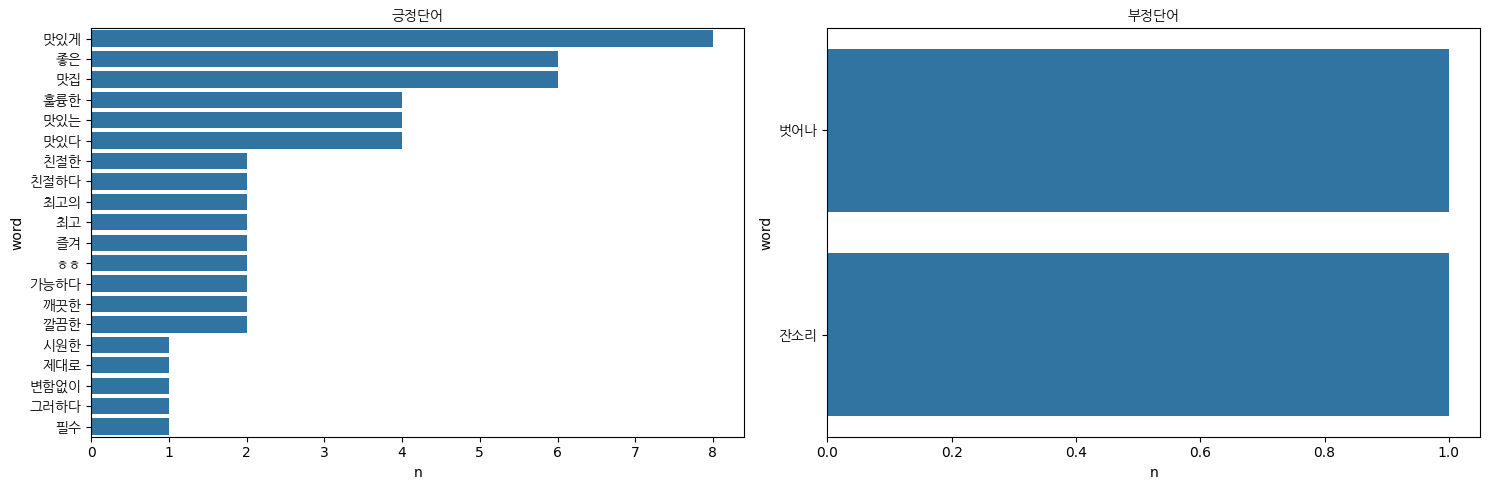

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# matplotlib 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# 긍정 단어 그래프
plt.subplot(1, 2, 1)
plt.title("긍정단어", fontproperties=font_prop)  # 제목 폰트 설정
sns.barplot(y="word", x="n", data=senti_counts_pos)
plt.yticks(fontproperties=font_prop)  # y축 폰트 설정

# 부정 단어 그래프
plt.subplot(1, 2, 2)
plt.title("부정단어", fontproperties=font_prop)  # 제목 폰트 설정
sns.barplot(y="word", x="n", data=senti_counts_neg)
plt.yticks(fontproperties=font_prop)  # y축 폰트 설정

plt.tight_layout()
plt.show()

## 감성단어 빈도분석(긍정/부정 통합)

In [ ]:
senti_counts_df.sort_values(["score"], ascending = True, inplace = True)
filter = (senti_counts_df["감성구분"] == "부정")
senti_counts_neg = senti_counts_df.loc[filter, ["word", "score"]][:20]
senti_counts_neg

,word,score
9,벗어나,-1.0
13,잔소리,-1.0


In [ ]:
senti_counts_df.sort_values(["score"], ascending = False, inplace = True)
filter = (senti_counts_df["감성구분"] == "긍정")
senti_counts_pos = senti_counts_df.loc[filter, ["word", "score"]][:20]
senti_counts_pos

,word,score
5,맛있게,8.0
8,맛집,6.0
15,좋은,6.0
22,훌륭한,4.0
6,맛있는,4.0
7,맛있다,4.0
0,ㅎㅎ,2.0
17,최고,2.0
3,깔끔한,2.0
4,깨끗한,2.0


In [ ]:
senti_counts_total = pd.concat([senti_counts_pos, senti_counts_neg], axis = 0)
senti_counts_total.sort_values(["score"], ascending = False, inplace = True)
senti_counts_total


,word,score
5,맛있게,8.0
15,좋은,6.0
8,맛집,6.0
22,훌륭한,4.0
6,맛있는,4.0
7,맛있다,4.0
1,가능하다,2.0
16,즐겨,2.0
20,친절한,2.0
19,친절하다,2.0


In [ ]:
# 긍정 점수 합 (양수만 합산)
positive_sum = senti_counts_total[senti_counts_total['score'] > 0]['score'].sum()

# 부정 점수 합 (음수만 절대값으로 합산)
negative_sum = abs(senti_counts_total[senti_counts_total['score'] < 0]['score'].sum())

# 부정 합 ÷ 긍정 합 계산
neg_to_pos_ratio = negative_sum / positive_sum

# 결과 출력
print(f"긍정 합: {positive_sum}")
print(f"부정 합 (절대값): {negative_sum}")
print(f"부정 합 ÷ 긍정 합: {neg_to_pos_ratio}")

긍정 합: 55.0
부정 합 (절대값): 2.0
부정 합 ÷ 긍정 합: 0.03636363636363636


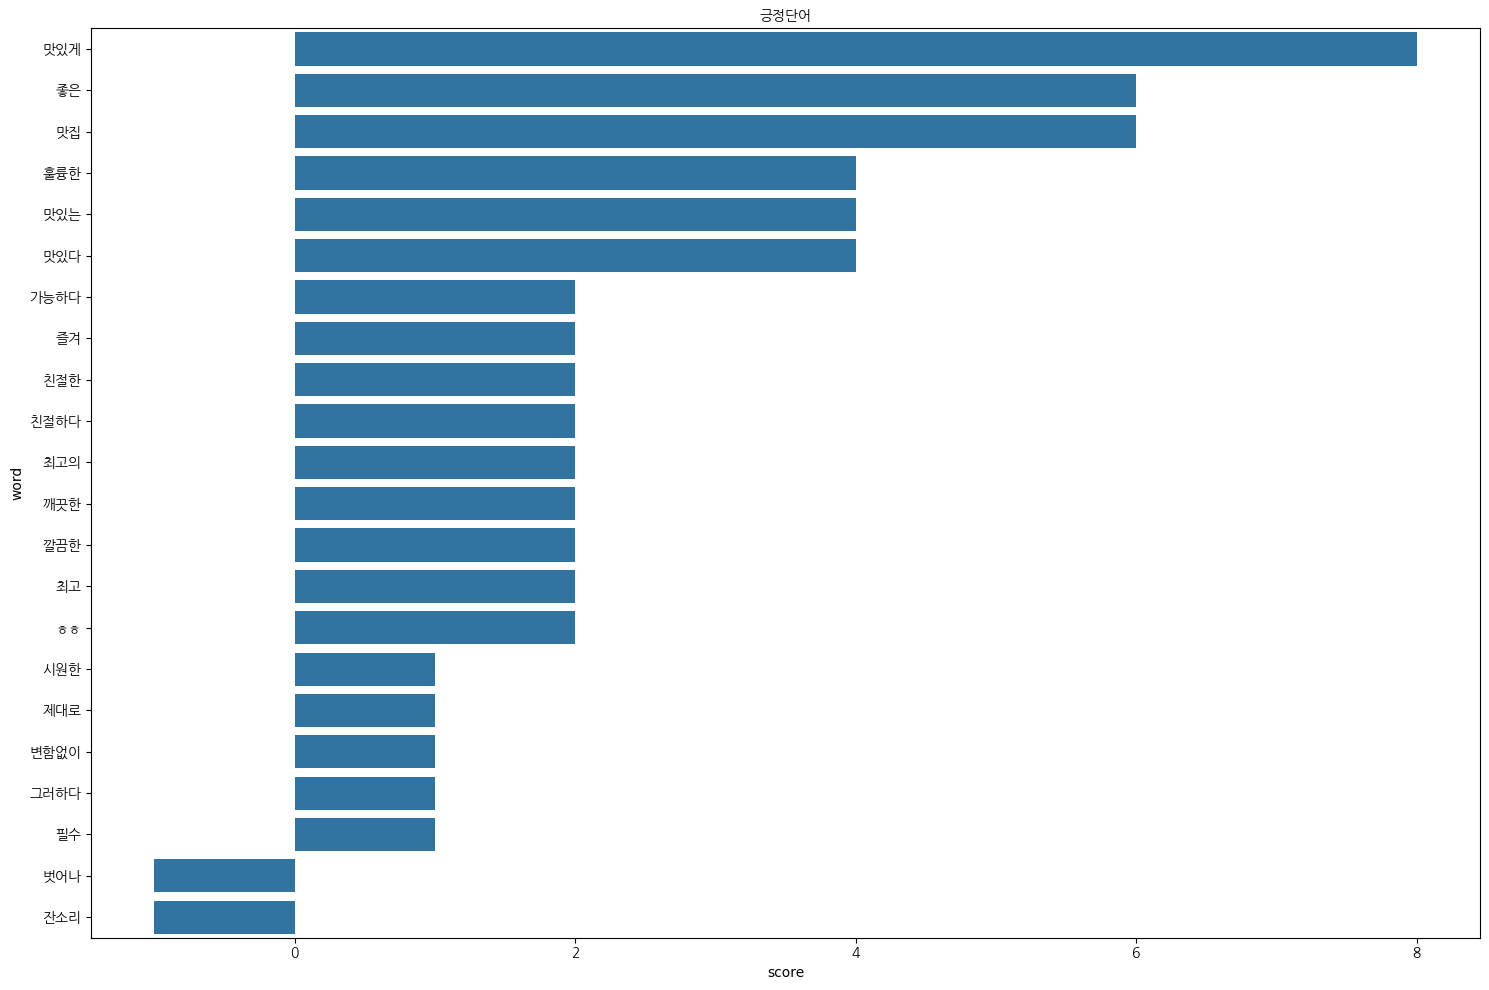

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 1. 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 사용 가능한 NanumGothic 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# 2. matplotlib 설정
plt.rcParams['font.family'] = font_prop.get_name()  # 전체 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3. 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 10))

plt.title("긍정단어", fontproperties=font_prop)  # 제목 폰트 설정
sns.barplot(y="word", x="score", data=senti_counts_total)  # 데이터: senti_counts_total 사용
plt.yticks(fontproperties=font_prop)  # y축 라벨 폰트 설정
plt.xticks(fontproperties=font_prop)  # x축 라벨 폰트 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()

# 전체 반복문

In [ ]:
restaurant_name=fm_df_origin['restaurant'].unique()
def sensitiment_score (name):
    fm_df = fm_df_origin[fm_df_origin["restaurant"] == name]
    stop_words = ["하다", "있다", "되다"]
    def simple_tokenizer(text):
        words = text.split()
        filtered_words = [word for word in words if len(word) > 1 and word not in stop_words]
        return filtered_words
    tm_list = []
    for i in range(len(fm_df)):
        reviews = fm_df["reviews"].iloc[i]
        if not isinstance(reviews, str):
            reviews = str(reviews) if reviews is not None else ""
        reviews = re.sub("\x00-\x1F\x7F]", "", reviews) # 제어문자 [[:cntrl:]]
        reviews = re.sub("[\W]", " ", reviews)          # 구두점 제거
        tm_list.append(reviews)
    words_list = []
    for text in tm_list:
        words_list.extend(simple_tokenizer(text))
    words_list_df = pd.DataFrame(words_list, columns = ["word"])
    join_df = pd.merge(words_list_df, senti_dic_df, how = "inner")
    senti_counts_df = join_df.groupby("word")["score"].sum().reset_index()
    senti_counts_df["n"] = senti_counts_df["score"].abs()
    senti_counts_df.sort_values(by = ["score"], ascending = False, inplace = True)
    senti_counts_df["감성구분"] = np.select([senti_counts_df["score"] >= 1,
                                senti_counts_df["score"] <= -1,
                                senti_counts_df["score"] == 0],
                                ["긍정", "부정", "중립"])
    filter = (senti_counts_df["감성구분"] == "부정")
    senti_counts_neg = senti_counts_df.loc[filter, ["word", "score"]][:20]
    senti_counts_df.sort_values(["score"], ascending = False, inplace = True)
    filter = (senti_counts_df["감성구분"] == "긍정")
    senti_counts_pos = senti_counts_df.loc[filter, ["word", "score"]][:20]
    senti_counts_total = pd.concat([senti_counts_pos, senti_counts_neg], axis = 0)
    senti_counts_total.sort_values(["score"], ascending = False, inplace = True)
    positive_sum = senti_counts_total[senti_counts_total['score'] > 0]['score'].sum()
    negative_sum = abs(senti_counts_total[senti_counts_total['score'] < 0]['score'].sum())
    neg_to_pos_ratio = negative_sum / positive_sum
    return(positive_sum, negative_sum, neg_to_pos_ratio)
data=[]
for name in restaurant_name:
    data.append({"restaurant": name, "sensitiment_score": sensitiment_score(name)})
df=pd.DataFrame(data)
print(df)

# 긍정합 / 부정합 / 점수

                     restaurant                   sensitiment_score
0                3대삼계장인  (159.0, 30.0, 0.18867924528301888)
1                          제제   (63.0, 20.0, 0.31746031746031744)
2             해물알탕전문  (119.0, 15.0, 0.12605042016806722)
3              야끼소바니주마루    (86.0, 22.0, 0.2558139534883721)
4    경춘자의라면땡기는날  (102.0, 20.0, 0.19607843137254902)
..                          ...                                 ...
364            가나점보돈까스    (67.0, 9.0, 0.13432835820895522)
365        녹원쌈밤연희점  (165.0, 31.0, 0.18787878787878787)
366                 연희곰탕                    (30.0, 6.0, 0.2)
367              산마루돌구이   (71.0, 2.0, 0.028169014084507043)
368                       포썸    (55.0, 2.0, 0.03636363636363636)

[369 rows x 2 columns]


In [ ]:
from google.colab import files

# df를 CSV 파일로 저장
df.to_csv('감성분석_구글맵_추가.csv', index=False, encoding='utf-8-sig')

# 저장한 CSV 파일 다운로드
files.download('감성분석_구글맵_추가.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df)

                       restaurant                   sensitiment_score
0       소문난왕족발순대국    (49.0, 7.0, 0.14285714285714285)
1                    기호네곱창    (49.0, 5.0, 0.10204081632653061)
2                 효자손왕만두                  (40.0, 9.0, 0.225)
3                  은성순대국  (115.0, 4.0, 0.034782608695652174)
4                   동해해물탕     (27.0, 3.0, 0.1111111111111111)
5          들마루가마솥순대국    (13.0, 1.0, 0.07692307692307693)
6                    명동분식                    (29.0, 0.0, 0.0)
7             원조국수전문점                    (24.0, 0.0, 0.0)
8                 맛있는 식사                   (30.0, 30.0, 1.0)
9                     버거앤치즈    (52.0, 5.0, 0.09615384615384616)
10                       가야가야    (82.0, 35.0, 0.4268292682926829)
11                    마포나룻가    (24.0, 4.0, 0.16666666666666666)
12               쭈꾸미랑순두부    (45.0, 4.0, 0.08888888888888889)
13                  